<a href="https://githubtocolab.com/borislevant/python4ml/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

# Classification: Logistic Regression & SVM

[![scikit-learn logo](./img/scikit-learn-logo-small.png)](https://scikit-learn.org/stable/)


In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import linear_model, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
%matplotlib inline


The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments. Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

The MNIST database contains 60,000 training images and 10,000 testing images. Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset. The original creators of the database keep a list of some of the methods tested on it. In their original paper, they use a support-vector machine to get an error rate of 0.8%.

![](./img/mnist_examples.png)

In this notebook we will use the small subset of 5000 digits images


In [25]:
# If you have an internet connection
# We can load the full data set via the Scikit-learn data_set package

# from sklearn.datasets import fetch_openml
# X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=True)
# X.iloc[:5000,:].to_csv('./data/mnist_7000_data.csv', index=False)
# y.iloc[:5000].to_csv('./data/mnist_7000_labels.csv', index=False)


In [34]:
X = pd.read_csv('./data/mnist_7000_data.csv', index_col=False)
y = pd.read_csv('./data/mnist_7000_labels.csv', index_col=False)
X.shape, y.shape

((5000, 784), (5000, 1))

Let's see how many different classes we have in the dataset

<AxesSubplot:>

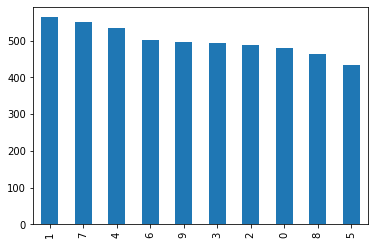

In [33]:
y['class'].value_counts().plot.bar()

Each row in X contains 784 features - representing the 28x28 pixels pictures. In order to view the pictures, we will rescale the 784 vector into the 2D matrix of 28x28 and then use the Matplotlib API for displaying the images. Let's view the first 9 images of the dataset


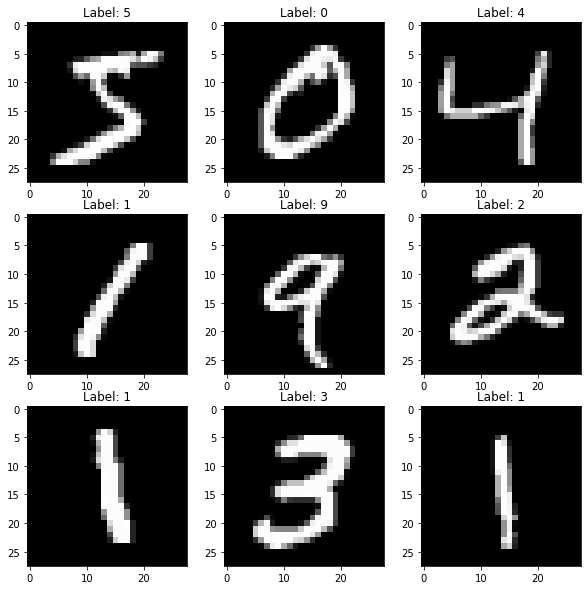

In [44]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
for i in range(3):
    for j in range(3):
        ax[i, j].imshow(X.iloc[i*3+j, :].values.reshape((28, 28)), cmap='gray')
        ax[i, j].set_title(f'Label: {y.iloc[i*3+j, 0]}')

## Logistic Regression

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

The outcome of the Logistic Regression is the vector of length equals to the number of classes that we want to predict. In our case it's 10 - digits from 0 to 9. The value of the vector at the `i`-th coordinate indicates the probability of the the sample to be of class `i`
$$
v[i]=P(y=i|X)
$$

When we train the Logistic regression model, we try to estimate the probability $p_k$ that a data sample (image) belongs to class $k$ (digit $k$):
$$
p_k = \frac{1}{1+e^{-z_k}} \\
z_k = a_{1,k} x_1 + \ldots + a_{m,k} x_m
$$
where $x_j$ is pixel $j$ and $a_{j,k}$ is the increase in favor of class $k$ when pixel $j$ is dark.

In this case the loss function we minimize is *not* the sum of residual squares, but rather the **cross-entropy**:
$$
loss(p, y) = \sum_{i=1}^{n}{\sum_{k=0}^{9}{y_{i,k} \log{p_{i,k}}}}
$$
where $i$ is the image index ($n$ images overall), $k$ is the digit (i.e. class), $y_{i,k}=1$ if image $i$ is of digit $k$ and $y_{i,k}=0$ otherwise, and $p_{i,k}$ is the model prediction about the probability that image $i$ is of digit $k$.

Before training the model, let's split the data into `train` and `test` sets 

In [58]:
n_train = 4500
X_train = X.values[:n_train, :]
X_test = X.values[n_train:, :]
y_train = y.values.ravel()[:n_train]
y_test = y.values.ravel()[n_train:]

In [60]:
clf = linear_model.LogisticRegression(random_state=0).fit(X_train, y_train)
print(f'Trian accuracy of the model: {clf.score(X_train, y_train)}')
print(f'Test accuracy of the model: {clf.score(X_test, y_test)}')

Trian accuracy of the model: 1.0
Test accuracy of the model: 0.892


c:\users\blevant170763\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In the case of the classification models, the accuracy of the model is defined as
$$
\frac{\text{The number of correct predictions}}{\text{Overall number of examples}}
$$

One already observes that our model **overfits** - namely it performs perfect on the train set, but ones we give it a test set - examples it didn't see during the train, it performs much worse: only **89.2%**

### Excercise 1

Implement the function that caclulates the accuracy of the classifier
```
def accuracy(y_labels, y_predicted):
    return np.average(y_labels == y_predicted)
```
Verify that the function calculates the same values for the `clf` model
```
accuracy(y_test, clf.predict(X_test))
```

In order to show the in-correctly classified examples, we can use the following

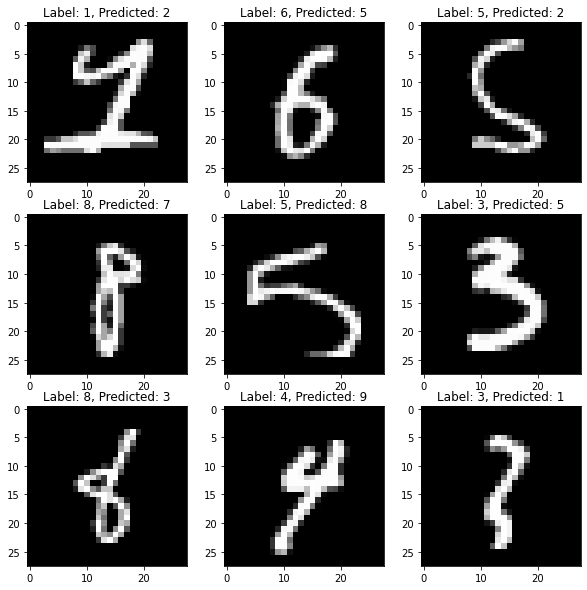

In [67]:
y_predicted = clf.predict(X_test)
X_test_wrong = X_test[y_predicted != y_test]
y_test_wrong = y_test[y_predicted != y_test]
y_predicted_wrong = y_predicted[y_predicted != y_test]

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
for i in range(3):
    for j in range(3):
        ax[i, j].imshow(X_test_wrong[i*3+j, :].reshape((28, 28)), cmap='gray')
        ax[i, j].set_title(f'Label: {y_test_wrong[i*3+j]}, Predicted: {y_predicted_wrong[i*3+j]}')


## Visualizing the models weights

Remember, that the Logistic regression model is just the weights of the size of the picture - 784, and we different weights for each of the classes. So we can visualize the weights for each class in the following way


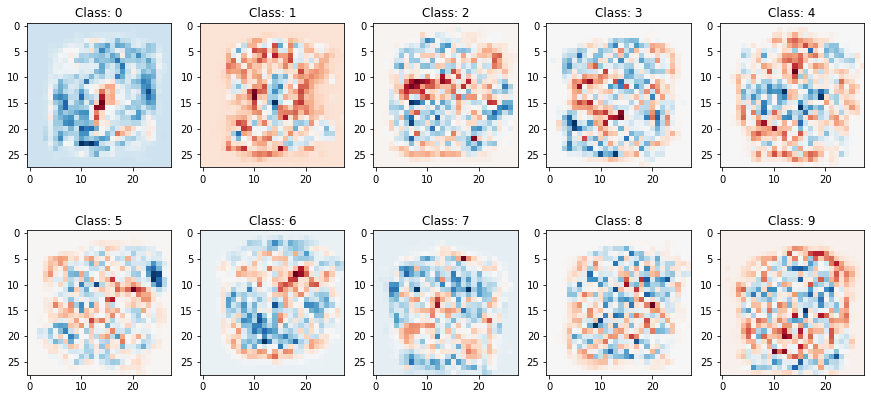

In [78]:
coef = clf.coef_
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 7))
for i in range(2):
    for j in range(5):
        ax[i, j].imshow(coef[i*5+j, :].reshape((28, 28)), cmap=plt.cm.RdBu)
        ax[i, j].set_title(f'Class: {i*5+j}')


## Improving the Logistic Regression model

In this part we will rescale the features of the model - dividing it by 255 (the largest possible value of the pixel) to bring everythiong into the range of 0 to 1

In [110]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255


In [113]:
from sklearn.model_selection import GridSearchCV

grid_params = {'C' : np.logspace(-3, 2, 10)}
gs = GridSearchCV(linear_model.LogisticRegression(random_state=0, solver='lbfgs', max_iter=500), grid_params, scoring='accuracy', cv=3, verbose=1)


In [114]:
g_res = gs.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\users\blevant170763\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\blevant170763\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

In [115]:
df_cv = pd.DataFrame(g_res.cv_results_)
df_cv.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.469302,0.020334,0.001330,0.001881,0.001,{'C': 0.001},0.806000,0.825333,0.820667,0.817333,0.008237,10
1,0.688506,0.019786,0.003001,0.002161,0.003594,{'C': 0.003593813663804626},0.843333,0.870000,0.874667,0.862667,0.013803,9
2,1.034297,0.147546,0.005207,0.007364,0.012915,{'C': 0.01291549665014884},0.864667,0.890667,0.896667,0.884000,0.013888,6
3,1.302196,0.062945,0.005209,0.007367,0.046416,{'C': 0.046415888336127795},0.882000,0.902667,0.908667,0.897778,0.011422,1
4,1.691227,0.068953,0.005212,0.007372,0.16681,{'C': 0.1668100537200059},0.876667,0.909333,0.907333,0.897778,0.014950,1
5,2.117550,0.102427,0.006544,0.006631,0.599484,{'C': 0.5994842503189409},0.876000,0.906667,0.900667,0.894444,0.013270,3
6,2.829069,0.120640,0.008207,0.005258,2.154435,{'C': 2.1544346900318843},0.874000,0.900000,0.891333,0.888444,0.010809,4
7,3.464262,0.185709,0.003672,0.002630,7.742637,{'C': 7.742636826811277},0.872000,0.898000,0.889333,0.886444,0.010809,5
8,3.854676,0.093883,0.010449,0.007389,27.825594,{'C': 27.825594022071257},0.866000,0.893333,0.888000,0.882444,0.011830,7
9,3.797169,0.082687,0.005211,0.007370,100.0,{'C': 100.0},0.864000,0.892667,0.886000,0.880889,0.012248,8


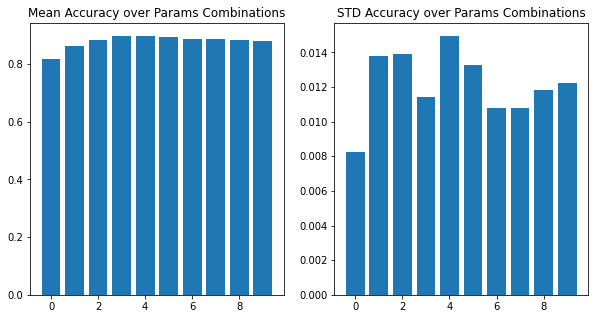

In [129]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].bar(range(df_cv.shape[0]), df_cv.mean_test_score.values)
ax[0].set_title('Mean Accuracy over Params Combinations')
ax[1].bar(range(df_cv.shape[0]), df_cv.std_test_score.values)
ax[1].set_title('STD Accuracy over Params Combinations')
plt.show()

In [117]:
g_res.best_score_, g_res.best_params_

(0.8977777777777778, {'C': 0.046415888336127795})

In [130]:
clf = linear_model.LogisticRegression(random_state=0, solver='lbfgs', max_iter=500, C=0.046, penalty='l2').fit(X_train_scaled, y_train)
print(f'Trian accuracy of the model: {clf.score(X_train_scaled, y_train)}')
print(f'Test accuracy of the model: {clf.score(X_test_scaled, y_test)}')

Trian accuracy of the model: 0.936
Test accuracy of the model: 0.908


## SVM

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

![](./img/svm.png)

To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.


In [131]:
grid_params = {'C' : np.logspace(-3, 2, 10)}
gs = GridSearchCV(svm.SVC(random_state=0), grid_params, scoring='accuracy', cv=3, verbose=1)


In [132]:
g_res = gs.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [133]:
df_cv = pd.DataFrame(g_res.cv_results_)
df_cv.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,5.706201,0.074299,4.900236,0.044146,0.001,{'C': 0.001},0.110667,0.111333,0.111333,0.111111,0.000314,9
1,5.626920,0.079956,4.809793,0.042903,0.003594,{'C': 0.003593813663804626},0.110667,0.111333,0.111333,0.111111,0.000314,9
2,5.703580,0.066363,4.833929,0.115140,0.012915,{'C': 0.01291549665014884},0.393333,0.378000,0.392000,0.387778,0.006935,8
3,4.219160,0.089355,4.349841,0.241245,0.046416,{'C': 0.046415888336127795},0.837333,0.856000,0.854000,0.849111,0.008368,7
4,2.437706,0.046021,3.156162,0.058533,0.16681,{'C': 0.1668100537200059},0.901333,0.919333,0.917333,0.912667,0.008055,6
5,1.666818,0.065491,2.271336,0.019407,0.599484,{'C': 0.5994842503189409},0.922667,0.941333,0.944000,0.936000,0.009491,5
6,1.573013,0.051783,2.041635,0.085019,2.154435,{'C': 2.1544346900318843},0.936000,0.952667,0.958000,0.948889,0.009370,1
7,1.531399,0.044206,2.109782,0.067713,7.742637,{'C': 7.742636826811277},0.938000,0.950000,0.956000,0.948000,0.007483,2
8,1.520972,0.051557,2.104263,0.140057,27.825594,{'C': 27.825594022071257},0.937333,0.950000,0.956000,0.947778,0.007781,3
9,1.515760,0.025524,1.969038,0.077412,100.0,{'C': 100.0},0.937333,0.950000,0.956000,0.947778,0.007781,3


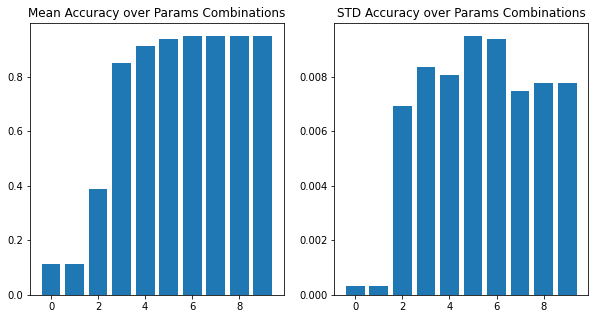

In [137]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].bar(range(df_cv.shape[0]), df_cv.mean_test_score.values)
ax[0].set_title('Mean Accuracy over Params Combinations')
ax[1].bar(range(df_cv.shape[0]), df_cv.std_test_score.values)
ax[1].set_title('STD Accuracy over Params Combinations')
plt.show()

In [134]:
g_res.best_score_, g_res.best_params_

(0.9488888888888889, {'C': 2.1544346900318843})

In [136]:
clf = svm.SVC(random_state=0, C=2.1).fit(X_train_scaled, y_train)
print(f'Trian accuracy of the model: {clf.score(X_train_scaled, y_train)}')
print(f'Test accuracy of the model: {clf.score(X_test_scaled, y_test)}')

Trian accuracy of the model: 0.9957777777777778
Test accuracy of the model: 0.958


We see that the SVM performs much better than the Logistic regression in this task. In the next weeks we will see the algorithms that achieve almost perfect performance on the task of MNIST handwritten digits recognition

# References

- Scikit-learn [supervised learning tutorial](http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html).
- [Tuning meta-parameters](http://scikit-learn.org/stable/modules/grid_search.html#grid-search) with cross validation.
- [One of the best notebooks for ML](https://www.kaggle.com/code/willkoehrsen/start-here-a-gentle-introduction/notebook)

# Futher exercise

- [Regression with a linear model](../exercises/linear-model.ipynb)
- [Classification with a logistic model](../exercises/logistic-tennis.ipynb)